<a href="https://colab.research.google.com/github/delgadojoseph271/chat_bot/blob/develop/bot_de_clasificacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Crear las carpetas para subir las imagenes

!mkdir coupe
!mkdir deportivos
!mkdir sedanes
!mkdir camionetas
!mkdir pickups


In [5]:
#Entrar en cada carpeta y descomprimir el archivo zip

%cd coupe
!unzip copues.zip
%cd ..
 
%cd deportivos
!unzip deportivos.zip
%cd ..

%cd sedanes
!unzip sedan.zip
%cd ..

%cd camionetas
!unzip camioneta.zip
%cd ..

%cd pickups
!unzip pickup.zip
%cd ..




/content/coupe
Archive:  copues.zip
  inflating: 1366_2000.jpeg          
  inflating: 1366_20002.jpeg         
  inflating: 14cb04e0-0150-4b6c-99e2-e333f7b78e4d.png  
  inflating: 15922484720597.jpg      
  inflating: 16502783822910.jpg      
  inflating: 18041816-1625668484.jpeg  
  inflating: 1920x1080-audi-rs-5-coupe-my2021-1513-oe.jpg  
  inflating: 1-bmw-m4-competition-2021-rt-hero-front.jpeg  
  inflating: 2016-Hyundai-Genesis-coupe-front-three-quarter.jpg  
  inflating: 2018_Infiniti_Q60_Leonberg_IMG_0156.jpg  
  inflating: 2020_mercedes-benz_c-class_coupe_amg-c-43_fq_oem_1_1600.jpg  
  inflating: 2020-Honda-Civic-Si-Coupe.jpg  
  inflating: 20211130-BMW-SERIE-2-COUPE-220I-EDICION-M-2022-COLOMBIA-PRECIO-CARACTERISTICAS-FICHA-TECNICA-01.jpg  
  inflating: 20211130-BMW-SERIE-2-COUPE-220I-EDICION-M-2022-COLOMBIA-PRECIO-CARACTERISTICAS-FICHA-TECNICA-03.jpg  
  inflating: 2022-BMW-M240i-Coupe-xDrive-First-Drive-Review-Featured-02-e1645807358862.jpg  
  inflating: 2022-camaro-masthea

In [6]:
#Borrar los archivo ZIP
!rm -rf /content/deportivos/deportivos.zip
!rm -rf /content/sedanes/sedan.zip
!rm -rf /content/coupe/copues.zip.
!rm -rf /content/camionetas/camionetas.zip
!rm -rf /content/pickups/pickup.zip

In [15]:
!rm -rf /content/deportivos/.ipynb_checkpoints
!rm -rf /content/sedanes/.ipynb_checkpoints
!rm -rf /content/coupe/.ipynb_checkpoints
!rm -rf /content/camionetas/.ipynb_checkpoints
!rm -rf /content/pickups/.ipynb_checkpoints

In [7]:
#Mostrar cuantas imagenes tengo de cada categoria
!ls /content/deportivos | wc -l #418
!ls /content/sedanes/ | wc -l #449
!ls /content/coupe | wc -l #484
!ls /content/camionetas | wc -l #503
!ls /content/pickups | wc -l #429

418
449
485
503
429


In [8]:
!mkdir dataset
!mkdir dataset/deportivos
!mkdir dataset/sedanes
!mkdir dataset/coupe
!mkdir dataset/camionetas
!mkdir dataset/pickups


In [16]:
import shutil
import os
carpeta_fuente = '/content/deportivos'
carpeta_destino = '/content/dataset/deportivos'

imagenes = os.listdir(carpeta_fuente)

for i, nombreimg in enumerate(imagenes):
  if i < 418:
    #Copia de la carpeta fuente a la destino
    shutil.copy(carpeta_fuente + '/' + nombreimg, carpeta_destino + '/' + nombreimg)

In [17]:
carpeta_fuente = '/content/sedanes'
carpeta_destino = '/content/dataset/sedanes'

imagenes = os.listdir(carpeta_fuente)

for i, nombreimg in enumerate(imagenes):
  if i < 419:
    #Copia de la carpeta fuente a la destino
    shutil.copy(carpeta_fuente + '/' + nombreimg, carpeta_destino + '/' + nombreimg)

In [12]:
carpeta_fuente = '/content/coupe'
carpeta_destino = '/content/dataset/coupe'

imagenes = os.listdir(carpeta_fuente)

for i, nombreimg in enumerate(imagenes):
  if i < 419:
    #Copia de la carpeta fuente a la destino
    shutil.copy(carpeta_fuente + '/' + nombreimg, carpeta_destino + '/' + nombreimg)

In [18]:
carpeta_fuente = '/content/pickups'
carpeta_destino = '/content/dataset/pickups'

imagenes = os.listdir(carpeta_fuente)

for i, nombreimg in enumerate(imagenes):
  if i < 419:
    #Copia de la carpeta fuente a la destino
    shutil.copy(carpeta_fuente + '/' + nombreimg, carpeta_destino + '/' + nombreimg)

In [19]:
carpeta_fuente = '/content/camionetas'
carpeta_destino = '/content/dataset/camionetas'

imagenes = os.listdir(carpeta_fuente)

for i, nombreimg in enumerate(imagenes):
  if i < 420:
    #Copia de la carpeta fuente a la destino
    shutil.copy(carpeta_fuente + '/' + nombreimg, carpeta_destino + '/' + nombreimg)

Found 1678 images belonging to 5 classes.
Found 415 images belonging to 5 classes.


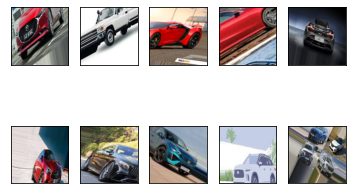

In [20]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

#Crear el dataset generador
datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range = 30,
    width_shift_range = 0.25,
    height_shift_range = 0.25,
    shear_range = 15,
    zoom_range = [0.5, 1.5],
    validation_split=0.2 #20% para pruebas
)

#Generadores para sets de entrenamiento y pruebas
data_gen_entrenamiento = datagen.flow_from_directory('/content/dataset', target_size=(224,224),
                                                     batch_size=32, shuffle=True, subset='training')
data_gen_pruebas = datagen.flow_from_directory('/content/dataset', target_size=(224,224),
                                                     batch_size=32, shuffle=True, subset='validation')

#Imprimir 10 imagenes del generador de entrenamiento
for imagen, etiqueta in data_gen_entrenamiento:
  for i in range(10):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(imagen[i])
  break
plt.show()


In [21]:
import tensorflow as tf
import tensorflow_hub as hub

url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
mobilenetv2 = hub.KerasLayer(url, input_shape=(224,224,3))

In [22]:
#Congelar el modelo descargado
mobilenetv2.trainable = False

In [23]:
modelo = tf.keras.Sequential([
    mobilenetv2,
    tf.keras.layers.Dense(5, activation='softmax')
])

In [24]:
modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [25]:
#Compilar como siempre
modelo.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [26]:
#Entrenar el modelo
EPOCAS = 50

historial = modelo.fit(
    data_gen_entrenamiento, epochs=EPOCAS, batch_size=32,
    validation_data=data_gen_pruebas
)

Epoch 1/50
53/53 [==============================] - ETA: 0s - loss: 1.5321 - accuracy: 0.3403

/usr/local/lib/python3.8/dist-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


53/53 [==============================] - 43s 622ms/step - loss: 1.5321 - accuracy: 0.3403 - val_loss: 1.2755 - val_accuracy: 0.4602
Epoch 2/50
53/53 [==============================] - 31s 592ms/step - loss: 1.2659 - accuracy: 0.4619 - val_loss: 1.1617 - val_accuracy: 0.5205
Epoch 3/50
53/53 [==============================] - 31s 586ms/step - loss: 1.1846 - accuracy: 0.5036 - val_loss: 1.1334 - val_accuracy: 0.5301
Epoch 4/50
53/53 [==============================] - 32s 600ms/step - loss: 1.1487 - accuracy: 0.5215 - val_loss: 1.0730 - val_accuracy: 0.5542
Epoch 5/50
53/53 [==============================] - 30s 574ms/step - loss: 1.0886 - accuracy: 0.5614 - val_loss: 1.0016 - val_accuracy: 0.5904
Epoch 6/50
53/53 [==============================] - 30s 576ms/step - loss: 1.0557 - accuracy: 0.5578 - val_loss: 1.0120 - val_accuracy: 0.6000
Epoch 7/50
53/53 [==============================] - 31s 589ms/step - loss: 1.0624 - accuracy: 0.5501 - val_loss: 1.0132 - val_accuracy: 0.5831
Epoch 8/50

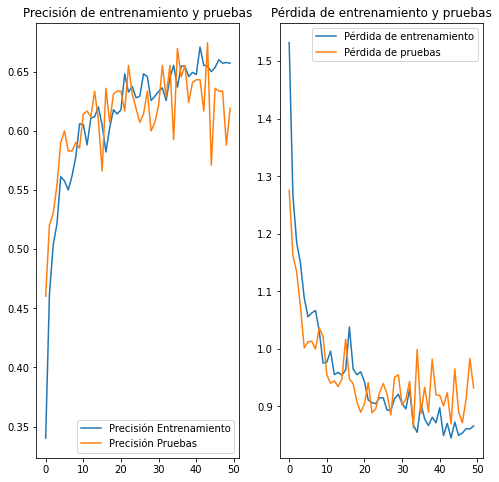

In [27]:
#Graficas de precisión
acc = historial.history['accuracy']
val_acc = historial.history['val_accuracy']

loss = historial.history['loss']
val_loss = historial.history['val_loss']

rango_epocas = range(50)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(rango_epocas, acc, label='Precisión Entrenamiento')
plt.plot(rango_epocas, val_acc, label='Precisión Pruebas')
plt.legend(loc='lower right')
plt.title('Precisión de entrenamiento y pruebas')

plt.subplot(1,2,2)
plt.plot(rango_epocas, loss, label='Pérdida de entrenamiento')
plt.plot(rango_epocas, val_loss, label='Pérdida de pruebas')
plt.legend(loc='upper right')
plt.title('Pérdida de entrenamiento y pruebas')
plt.show()

In [28]:
from PIL import Image
import requests
from io import BytesIO
import cv2

def categorizar(url):
  respuesta = requests.get(url)
  img = Image.open(BytesIO(respuesta.content))
  img = np.array(img).astype(float)/255

  img = cv2.resize(img, (224,224))
  prediccion = modelo.predict(img.reshape(-1, 224, 224, 3))
  return np.argmax(prediccion[0], axis=-1)


In [33]:
def hacer_prediccion(url):
  prediccion = categorizar(url)
  print(prediccion)
  return prediccion
#0 camionetas
#1 coupe
#2 deportivos
#3 pick up
#4 sedan

1/1 [==============================] - 0s 27ms/step
2


2

In [35]:
#Crear la carpeta para exportarla a TF Serving
!mkdir -p carpeta_salida/modelo_carros/1

In [36]:
#Guardar el modelo en formato SavedModel
modelo.save('carpeta_salida/modelo_carros/1')

In [37]:
#Hacerlo un zip para bajarlo y usarlo en otro lado
!zip -r modelo_carros.zip /content/carpeta_salida/modelo_carros/

  adding: content/carpeta_salida/modelo_carros/ (stored 0%)
  adding: content/carpeta_salida/modelo_carros/1/ (stored 0%)
  adding: content/carpeta_salida/modelo_carros/1/assets/ (stored 0%)
  adding: content/carpeta_salida/modelo_carros/1/variables/ (stored 0%)
  adding: content/carpeta_salida/modelo_carros/1/variables/variables.index (deflated 78%)
  adding: content/carpeta_salida/modelo_carros/1/variables/variables.data-00000-of-00001 (deflated 8%)
  adding: content/carpeta_salida/modelo_carros/1/keras_metadata.pb (deflated 81%)
  adding: content/carpeta_salida/modelo_carros/1/saved_model.pb (deflated 92%)
